In [ ]:
# --------------Task 1--------------------------

# In this task you will be asked to use a programming language of your choice
# to get historical trading data from two exchanges, visualize it and comment
# on the results if you see anything interesting.

# Download a full day of production trade history for BTC/USD from either
# exchange below:
# Coinbase Pro - https://docs.pro.coinbase.com/. Endpoint: GET /products/<product-id>/trades
# Gemini - https://docs.gemini.com/rest-api/. Endpoint: GET https://api.gemini.com/v1/trades/:symbol
# Make sure this is the raw trade data
# Store the data in a format of your choice

# Produce a report for the data set showing:
# Hourly bars of:
# Open, high, low, close, change, Volume

# Bonus:
# Add VWAP per bar
# Add Notional Value per bar

# Make sure you keep your data for further analysis tasks.

# Download a full day of production trade history of ETH/BTC from your chosen exchange
# Store the data in a format of your choice.
# Produce a report for ETH/BTC showing notional volume in USD.
# Make your results, code and data available for review.

In [215]:
import requests
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpl_finance as mpf

In [162]:
#------------TASK 1- GEMINI API------------------- 

In [161]:
# function for converting timestamp into date/time format

def convert_timestamp(tt):
    tt= str(tt)[0:10]
    converted = datetime.datetime.fromtimestamp(int(tt)).isoformat()
    return converted


# function for slicing only the hour out of the date/time

def slice(row):
    row=row[11:13]
    return row

In [100]:
# GETTING BITCOIN TRADING DATA

#url='https://api.gemini.com/v1/trades/BTCUSD?limit_trades=500'
response=requests.get(url)
response
data= pd.DataFrame(response.json())
data['date']=data['timestamp'].apply(convert_timestamp)
data['hour']=data['date'].apply(slice)
data


,Unnamed: 0,timestamp,timestampms,tid,price,amount,exchange,type,date,hour
0,0,1618445332,1618445332218,33782995482,63175.01,0.001473,gemini,buy,2021-04-14T19:08:52,19
1,1,1618445331,1618445331211,33782991444,63177.22,0.001472,gemini,buy,2021-04-14T19:08:51,19
2,2,1618445328,1618445328470,33782986809,63183.31,0.000414,gemini,buy,2021-04-14T19:08:48,19
3,3,1618445325,1618445325741,33782980488,63191.72,0.015507,gemini,buy,2021-04-14T19:08:45,19
4,4,1618445325,1618445325023,33782978494,63209.41,0.053610,gemini,buy,2021-04-14T19:08:45,19
...,...,...,...,...,...,...,...,...,...,...
495,495,1618444331,1618444331604,33779636987,62650.00,0.000005,gemini,buy,2021-04-14T18:52:11,18
496,496,1618444331,1618444331534,33779636843,62650.00,0.031800,gemini,buy,2021-04-14T18:52:11,18
497,497,1618444331,1618444331482,33779636797,62650.00,0.079756,gemini,buy,2021-04-14T18:52:11,18
498,498,1618444331,1618444331477,33779636791,62650.00,0.001833,gemini,buy,2021-04-14T18:52:11,18


In [101]:
# saving data
data.to_csv(r"C:\Users\Zoe Mercury\Desktop\Careerhack\ErisX\btc_trading_data.csv")

In [ ]:
# With the Gemini API the maximum number of datapoints returned is 500.
# In the interval of the given timestamps, this doesn't even cover one full hour
# However, if I had the according data points for a full 24h of transactions, this is how I would calculate the Open, high, low, close, change, Volume

In [102]:
# Checking data types and converting if necessary
print(data.dtypes)
data['amount'] = data['amount'].astype(float)


Unnamed: 0       int64
timestamp        int64
timestampms      int64
tid              int64
price          float64
amount         float64
exchange        object
type            object
date            object
hour            object
dtype: object


In [127]:
# CALCULATING HOURLY VOLUME

hourly_volume=data.groupby(by='hour').agg({'amount':['sum']})
hourly_volume.columns = hourly_volume.columns.droplevel(0)
hourly_volume.columns=['Volume']
hourly_volume

,Volume
hour,
18,5.318195
19,15.988035


In [122]:
# CALCULATING OPEN & CLOSE

hourly_open=data.groupby(by='hour').agg({'price':['last']})
hourly_open.columns = hourly_open.columns.droplevel(0)
hourly_open.columns=['Opening Price']

hourly_close=data.groupby(by='hour').agg({'price':['first']})
hourly_close.columns = hourly_close.columns.droplevel(0)
hourly_close.columns=['Closing Price']

pd.merge(hourly_open, hourly_close, on = "hour", how = "inner")

,Opening Price,Closing Price
hour,,
18,62650.00,62972.24
19,62976.86,63175.01


In [125]:
# CALCULATING HIGH & LOW

hourly_high=data.groupby(by='hour').agg({'price':['max']})
hourly_high.columns = hourly_high.columns.droplevel(0)
hourly_high.columns=['High']

hourly_low=data.groupby(by='hour').agg({'price':['min']})
hourly_low.columns = hourly_low.columns.droplevel(0)
hourly_low.columns=['Low']

pd.merge(hourly_high, hourly_low, on = "hour", how = "inner")

,High,Low
hour,,
18,63053.74,62600.00
19,63380.00,62976.86


In [167]:
# CALCULATING CHANGE

hourly_avg=data.groupby(by='hour').agg({'price':['mean']})
hourly_avg.columns=['Average']
hourly_avg['Change in %']= hourly_avg.pct_change()
hourly_avg

# see below for the script working with more data

,Average,Change in %
hour,,
18,62802.387722,NaN
19,63277.999620,0.007573


In [178]:
# ANOTHER SOLUTION: Just use a different endpoint that gives us exactly the data we need (or use another Exchange API i.e. Binance that provides more trade history data)

url='https://api.gemini.com/v2/candles/btcusd/1hr'

response=requests.get(url)
btc_candles= pd.DataFrame(response.json())
btc_candles.columns=['Timestamp','Open','High','Low','Close','Volume']
btc_candles['Time']=btc_candles['Timestamp'].apply(convert_timestamp)
btc_candles['Hour']=btc_candles['Time'].apply(slice)
btc_candles['Change in %']= btc_candles['Close'].pct_change()
btc_candles

,Timestamp,Open,High,Low,Close,Volume,Time,Hour,Change in %
0,1618498800000,62696.74,62836.69,62483.16,62569.25,22.396338,2021-04-15T10:00:00,10,NaN
1,1618495200000,62993.73,63069.50,62612.01,62696.74,63.350246,2021-04-15T09:00:00,09,0.002038
2,1618491600000,62658.99,63134.13,62658.99,62993.73,61.931182,2021-04-15T08:00:00,08,0.004737
3,1618488000000,62367.45,62759.38,62363.39,62658.99,54.997689,2021-04-15T07:00:00,07,-0.005314
4,1618484400000,62162.22,62550.00,62045.00,62367.45,38.425981,2021-04-15T06:00:00,06,-0.004653
...,...,...,...,...,...,...,...,...,...
1456,1613257200000,47151.22,47365.97,47100.00,47262.28,11.880297,2021-02-13T18:00:00,18,-0.008320
1457,1613253600000,47188.38,47353.08,46940.27,47151.22,30.030740,2021-02-13T17:00:00,17,-0.002350
1458,1613250000000,47012.20,47434.81,46800.00,47188.38,67.347686,2021-02-13T16:00:00,16,0.000788
1459,1613246400000,46940.21,47051.43,46757.78,47012.20,72.919463,2021-02-13T15:00:00,15,-0.003734


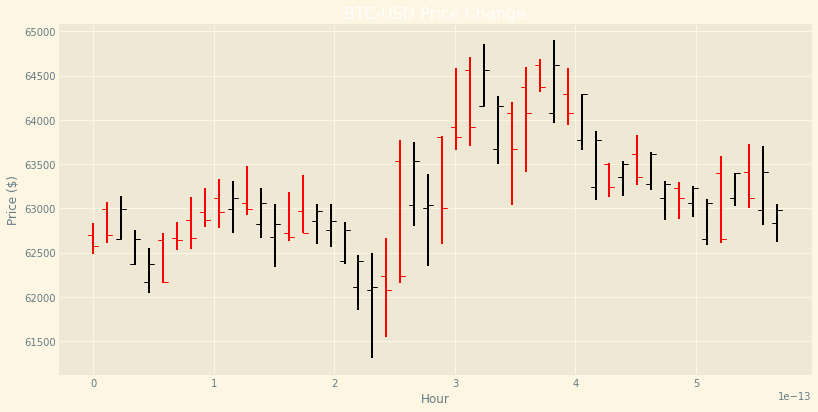

In [214]:
# DISPLAYING CANDLES WITH MATPLOTLIB

data = btc_candles

dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[:50], ticksize = 5)

ax.set_xlabel('Hour')
ax.set_ylabel('Price ($)')
ax.set_title('BTC-USD Price Change')

plt.show()


In [57]:
# CALCUALTE VWAP
# VWAPs are similar to Moving Averages, only that we take into consideration the Volume & Price, instead of just the Price
# Example of 20-VWAP Calculation:

btc_candles['volumeXprice']=((btc_candles['High']+btc_candles['Low'])/2)*btc_candles['Volume']
btc_candles['VWAP_Volume']=btc_candles['Volume'].rolling(20).sum()
btc_candles['VWAP_Vol_x_Price']=btc_candles['volumeXprice'].rolling(20).sum()
btc_candles['VWAP20']=btc_candles['VWAP_Vol_x_Price']/btc_candles['VWAP_Volume']
btc_candles

,Timestamp,Open,High,Low,Close,Volume,Time,volumeXprice,VWAP_Volume,VWAP_Vol_x_Price,VWAP20
0,1618412400000,63000.00,63386.20,62348.99,62917.89,118.420606,2021-04-14T10:00:00,7.444819e+06,NaN,NaN,NaN
1,1618408800000,63809.58,63823.59,62597.87,63000.00,248.926523,2021-04-14T09:00:00,1.573483e+07,NaN,NaN,NaN
2,1618405200000,63914.51,64586.70,63656.01,63809.58,157.434705,2021-04-14T08:00:00,1.009493e+07,NaN,NaN,NaN
3,1618401600000,64567.25,64710.00,63700.00,63914.51,65.549402,2021-04-14T07:00:00,4.208599e+06,NaN,NaN,NaN
4,1618398000000,64159.02,64859.20,64159.02,64567.25,59.248441,2021-04-14T06:00:00,3.822064e+06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1456,1613170800000,47955.06,48005.60,47250.01,47480.98,104.071253,2021-02-12T18:00:00,4.956685e+06,1274.388690,6.026906e+07,47292.524417
1457,1613167200000,47947.81,48044.47,47740.02,47955.06,59.227068,2021-02-12T17:00:00,2.836517e+06,1270.377708,6.013668e+07,47337.638902
1458,1613163600000,47689.77,48246.60,47660.00,47947.81,91.458288,2021-02-12T16:00:00,4.385727e+06,1298.040193,6.152266e+07,47396.577994
1459,1613160000000,47354.97,47765.46,47250.00,47689.77,50.502042,2021-02-12T15:00:00,2.399237e+06,1249.622873,5.925344e+07,47417.059711


In [134]:
# GETTING ETHEREUM TRADING DATA

url='https://api.gemini.com/v1/trades/ETHBTC?limit_trades=500'
response=requests.get(url)
response
eth_data= pd.DataFrame(response.json())
eth_data['date']=eth_data['timestamp'].apply(convert_timestamp)
eth_data['hour']=eth_data['date'].apply(slice)
eth_data['amount'] = eth_data['amount'].astype(float)
eth_data


,timestamp,timestampms,tid,price,amount,exchange,type,date,hour
0,1618455467,1618455467584,33809679819,0.03858,14.925400,gemini,sell,2021-04-14T21:57:47,21
1,1618455261,1618455261452,33809175271,0.03862,14.925400,gemini,sell,2021-04-14T21:54:21,21
2,1618455098,1618455098192,33808720466,0.03864,1.706300,gemini,sell,2021-04-14T21:51:38,21
3,1618455098,1618455098192,33808720464,0.03864,0.230000,gemini,sell,2021-04-14T21:51:38,21
4,1618455098,1618455098192,33808720462,0.03864,15.000000,gemini,sell,2021-04-14T21:51:38,21
...,...,...,...,...,...,...,...,...,...
495,1618418314,1618418314553,33709542419,0.03765,0.350000,gemini,buy,2021-04-14T11:38:34,11
496,1618418314,1618418314553,33709542417,0.03764,5.710000,gemini,buy,2021-04-14T11:38:34,11
497,1618418314,1618418314553,33709542415,0.03764,2.097466,gemini,buy,2021-04-14T11:38:34,11
498,1618418314,1618418314553,33709542413,0.03763,0.165258,gemini,buy,2021-04-14T11:38:34,11


In [135]:
# saving data

eth_data.to_csv(r"C:\Users\Zoe Mercury\Desktop\Careerhack\ErisX\eth_trading_data.csv")

In [136]:
# function to get ETH price
def eth_price():
    url= "https://api.gemini.com/v1/pubticker/ethusd"
    response=requests.get(url)
    eth_price=response.json()['last']
    return eth_price

In [140]:
# CALCULATING VOLUME in $ FROM TRADING DATA

hourly_volume=eth_data.groupby(by='hour').agg({'amount':['sum']})
hourly_volume.columns = hourly_volume.columns.droplevel(0)
hourly_volume.columns=['Volume']
hourly_volume['Volume_$']=hourly_volume['Volume']*float(eth_price())
hourly_volume


,Volume,Volume_$
hour,,
11,232.759178,562655.743295
12,138.352682,334444.088368
13,20.538819,49649.103333
14,67.034868,162045.398188
15,20.647282,49911.293230
16,176.276954,426119.568222
17,49.742081,120243.024132
18,71.660558,173227.215679
19,71.423524,172654.227271


In [141]:
# GETTING HOURLY VOLUME WITH CANDLES ENDPOINT
# using other API endpoint for comparison of accuracy of above calculation 

url='https://api.gemini.com/v2/candles/ethbtc/1hr'

response=requests.get(url)
eth_candles= pd.DataFrame(response.json())
eth_candles.columns=['Timestamp','Open','High','Low','Close','Volume']
eth_candles['Time']=eth_candles['Timestamp'].apply(convert_timestamp)
eth_candles

,Timestamp,Open,High,Low,Close,Volume,Time
0,1618455600000,0.03858,0.03858,0.03853,0.03853,42.574400,2021-04-14T22:00:00
1,1618452000000,0.03859,0.03867,0.03857,0.03858,109.625501,2021-04-14T21:00:00
2,1618448400000,0.03853,0.03861,0.03832,0.03859,93.245102,2021-04-14T20:00:00
3,1618444800000,0.03860,0.03869,0.03853,0.03853,71.423524,2021-04-14T19:00:00
4,1618441200000,0.03848,0.03883,0.03848,0.03860,71.660558,2021-04-14T18:00:00
...,...,...,...,...,...,...,...
1456,1613214000000,0.03836,0.03837,0.03810,0.03817,92.917899,2021-02-13T06:00:00
1457,1613210400000,0.03876,0.03876,0.03836,0.03836,7.844702,2021-02-13T05:00:00
1458,1613206800000,0.03850,0.03879,0.03850,0.03876,24.521360,2021-02-13T04:00:00
1459,1613203200000,0.03834,0.03853,0.03834,0.03850,88.379584,2021-02-13T03:00:00
